# Statistical Analyses

In [93]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
#from sklearn.linear_model import LinearRegression, LogisticRegression

In [94]:
# Load DF
df = pd.read_csv('C:/Users/nickm/Desktop/Coding/Projects/marketing-analytics-data/ifood_df.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


## Linear Regression predicting Amounts Spent

In [95]:
# Define potential y and X variables
y_cols = ['MntWines',
          'MntFruits',
          'MntMeatProducts',
          'MntFishProducts',
          'MntSweetProducts',
          'MntGoldProds']

X_remove = ['Z_CostContact',
            'Z_Revenue',
            'MntTotal',
            'MntRegularProds',
            'AcceptedCmpOverall']

X_cols_all = [col for col in df.columns.to_list() if col not in X_remove]

# Create empty df to store results in
final = pd.DataFrame()
final.index = X_cols_all + ['Adj_R_squared']

# Run analysis for all defined dependent variables
for y_col in y_cols:
    # Define model variables
    y = df[y_col]
    X_cols = [col for col in X_cols_all if col != y_col]
    X = df.filter(X_cols)

    # Run regression model
    Xc = sm.add_constant(X)
    model = sm.OLS(y, Xc)
    result = model.fit()
    
    # Store temporary results and filter out only signficiant (p<0.05) parameters
    temp_res = pd.DataFrame()
    temp_res[y_col], temp_res['p_value'] = result.params, result.pvalues
    temp_res = temp_res.loc[temp_res['p_value'] <= 0.05, y_col]
    
    # Merge results to final df
    final = final.merge(temp_res, how='left', left_index=True, right_index=True)

    # include adj. R squared
    final[y_col]['Adj_R_squared'] = result.rsquared_adj
    
print(final)


                        MntWines  MntFruits  MntMeatProducts  MntFishProducts   
Income                  0.005619   0.000277         0.003240         0.000337  \
Kidhome               -48.338234        NaN              NaN              NaN   
Teenhome                     NaN  -3.220610       -71.558704        -9.169251   
Recency                      NaN        NaN         0.210157              NaN   
MntWines                     NaN        NaN         0.071146              NaN   
MntFruits                    NaN        NaN         0.500322         0.272458   
MntMeatProducts         0.139620   0.027064              NaN         0.037164   
MntFishProducts              NaN   0.158976         0.400869              NaN   
MntSweetProducts       -0.527560   0.195106         0.255756         0.240184   
MntGoldProds                 NaN   0.057056        -0.170054         0.113184   
NumDealsPurchases            NaN        NaN         4.383641              NaN   
NumWebPurchases        13.02

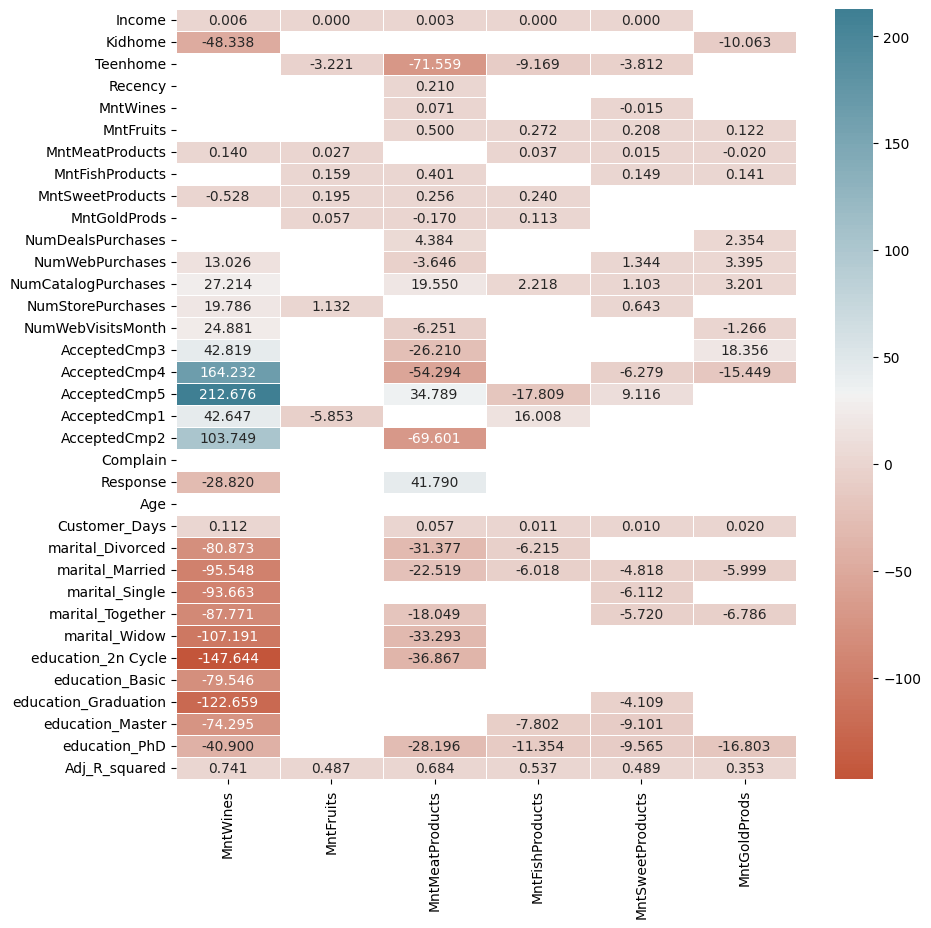

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(final, annot=True, fmt='.3f', linewidths=0.5, cmap=sns.diverging_palette(20, 220, n=200));